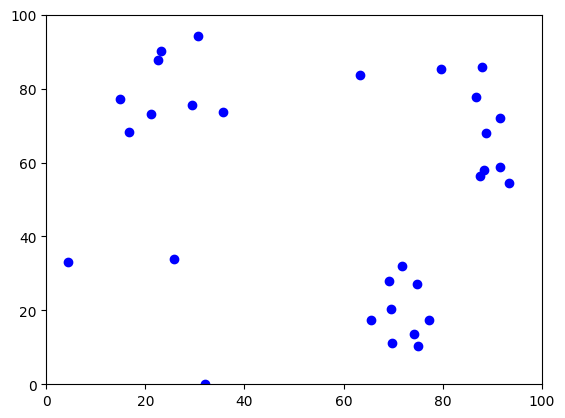

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Boid:
    def __init__(self, position, velocity):
        self.position = np.array(position, dtype=float)
        self.velocity = np.array(velocity, dtype=float)

    def update(self, boids, weights, radius):
        separation_force = np.zeros(2)
        alignment_force = np.zeros(2)
        cohesion_force = np.zeros(2)
        
        neighbors = [b for b in boids if np.linalg.norm(b.position - self.position) < radius and b != self]
        if neighbors:
            for neighbor in neighbors:
                separation_force += (self.position - neighbor.position) / np.linalg.norm(self.position - neighbor.position)**2
                alignment_force += neighbor.velocity
                cohesion_force += neighbor.position
            
            separation_force /= len(neighbors)
            alignment_force = (alignment_force / len(neighbors)) - self.velocity
            cohesion_force = (cohesion_force / len(neighbors)) - self.position
        
        total_force = (weights[0] * separation_force +
                       weights[1] * alignment_force +
                       weights[2] * cohesion_force)
        
        self.velocity += total_force
        self.position += self.velocity

# Initialize boids
num_boids = 30
boids = [Boid(position=np.random.rand(2) * 100, velocity=(np.random.rand(2) - 0.5) * 10) for _ in range(num_boids)]

# Simulation parameters
weights = [1.5, 1.0, 1.0]  # Separation, alignment, cohesion
radius = 15
steps = 200

# Run simulation
plt.ion()
fig, ax = plt.subplots()

for _ in range(steps):
    ax.clear()
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    for boid in boids:
        boid.update(boids, weights, radius)
        ax.plot(boid.position[0], boid.position[1], 'bo')
    plt.pause(0.05)